# Learning rate = 0.0001 & batch size = 32

In [1]:
# Train model
from model import NN
from customDataModuleoriginal import CustomDataModule
import config
import pytorch_lightning as pl
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_lightning.loggers import CSVLogger
from lightning.pytorch import seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint
import torch
import torchvision.models as models
import torch.nn as nn

seed_everything(
    42, workers=True
)  # By setting workers=True in seed_everything(), Lightning derives unique seeds across all dataloader workers and processes for torch, numpy and stdlib random number generators. When turned on, it ensures that e.g. data augmentations are not repeated across workers.


callbacks = [ModelCheckpoint(
    save_top_k=1, mode='min', monitor="val_loss")]  # save top 1 model 


if __name__ == "__main__":
    
    pytorch_model = models.resnet18(weights='ResNet18_Weights.DEFAULT')
    
    logger = TensorBoardLogger("tb_logs_batchsize32lr", name="resnet_batchsize32lr") # tb_logs is the folder, name is the name of the experiment/model
    logger2 = CSVLogger(save_dir="logs-batchsize32lr/", name="resnet_batchsize32lr")
    
    model = NN(
        model=pytorch_model,
        input_shape=config.INPUT_SHAPE,
        num_classes=config.NUM_CLASSES,
        learning_rate=config.LEARNING_RATE,
    )  # .to(device)
    dm = CustomDataModule(
        data_dir=config.DATA_DIR,
        train_csv=config.TRAIN_CSV_1,
        val_csv=config.VAL_CSV_1,
        test_csv=config.TEST_CSV,
        batch_size=32,
        num_workers=config.NUM_WORKERS,
        mean=config.MEAN,
        std=config.STD
    )
    
    trainer = pl.Trainer(
        logger=[logger2, logger],
        accelerator=config.ACCELERATOR,
        devices=config.DEVICES,
        min_epochs=config.MIN_EPOCHS,
        max_epochs=config.MAX_EPOCHS,
        deterministic=config.DETERMINISTIC,
        callbacks=callbacks
    )
      # deterministic ensures random seed reproducibility

    trainer.fit(model, dm)  # it will automatically know which dataloader to use
    
# A general place to start is to set num_workers equal to the number of CPU cores on that machine. You can get the number of CPU cores in python using os.cpu_count(), but note that depending on your batch size, you may overflow RAM memory.


Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: logs/resnet_sklearnclassweights
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | ResNet           | 11.2 M
1 | loss_fn   | CrossEntropyLoss | 0     
2 | train_acc | BinaryAccuracy   | 0     
3 | val_acc   | BinaryAccuracy   | 0     
4 | test_acc  | BinaryAccuracy   | 0     
-----------------------------------------------
1.0 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Epoch 0: 100%|██████████| 321/321 [01:48<00:00,  2.95it/s, v_num=0]        
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|██████████| 321/321 [01:50<00:00,  2.90it/s, v_num=0, train_loss=0.679, train_accuracy=0.654]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 321/321 [01:45<00:00,  3.03it/s, v_num=0, train_loss=0.635, train_accuracy=0.689]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|██████████| 321/321 [01:45<00:00,  3.03it/s, v_num=0, train_loss=0.607, train_accuracy=0.706]
Validation: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████| 321/321 [01:44<00:00,  3.07it/s, v_num=0, train_loss=0.599, train_accuracy=0.724]
Validation: 0it [00:00, ?it/s]
Epoch 5: 100%|██████████| 321/321 [01:51<00:00,  2.88it/s, v_num=0, train_loss=0.583, train_accuracy=0.723]
Validation: 0it [00:00, ?it/s]
Epoch 6: 100%|██████████| 321/321 [01:50<00:00,  2.92it/s, v_num=0, train_loss=0.595, train_accuracy=0.711]
Validation: 0it [00:00, ?it/s]
Epoch 7: 100%|██████████| 321/321 [01:44<00:00,  3.08it/s, 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 321/321 [02:22<00:00,  2.25it/s, v_num=0, train_loss=0.558, train_accuracy=0.742]


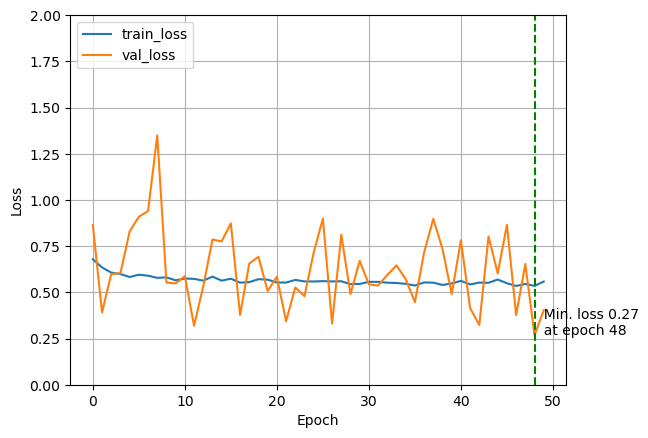

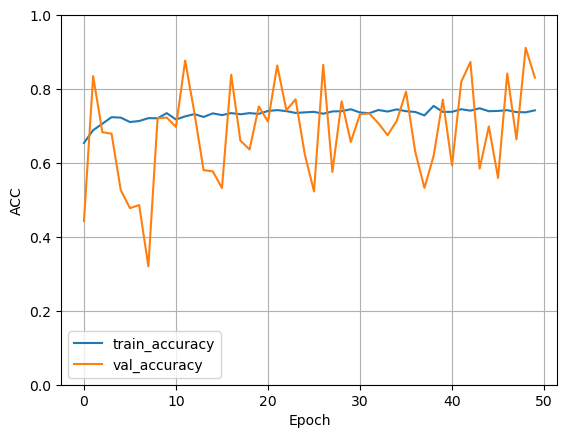

In [2]:
from plot_loss_and_acc import *
plot_loss_and_acc(trainer.logger.log_dir, loss_ylim=(0.0, 2.0), acc_ylim=(0.0, 1.0))

In [3]:
path = trainer.checkpoint_callback.best_model_path
print(path)

logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt


In [4]:
trainer.validate(model=model, datamodule=dm, ckpt_path=path)

Restoring states from the checkpoint path at logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt


Validation DataLoader 0: 100%|██████████| 88/88 [00:25<00:00,  3.42it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.9115329384803772     │
│         val_loss          │    0.2684180438518524     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.2684180438518524, 'val_accuracy': 0.9115329384803772}]

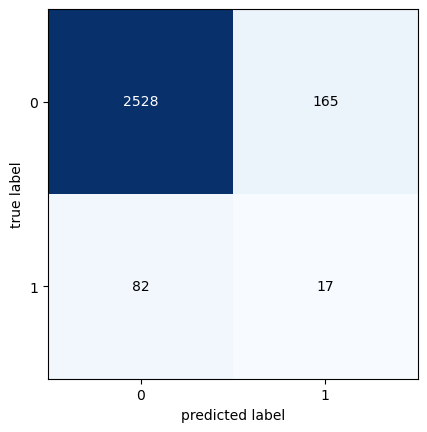

true negatives (TN): 2528
false positives (FP): 165
false negatives (FN): 82
true positives (TP): 17
accuracy: 0.9115329512893983
precision: 0.09340659340659341
recall: 0.1717171717171717
f1score: 0.12099644128113879
Parcel level accuracy: 0.9495 (94.95%)


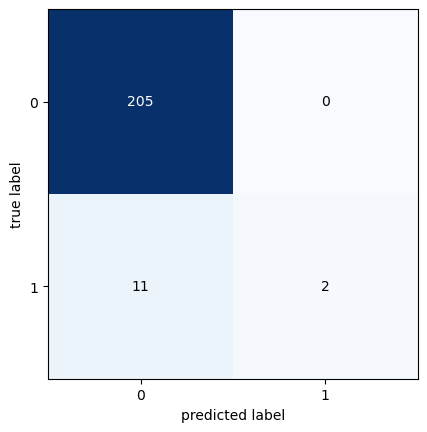

true negatives (TN): 205
false positives (FP): 0
false negatives (FN): 11
true positives (TP): 2
accuracy: 0.9495412844036697
precision: 1.0
recall: 0.15384615384615385
f1score: 0.2666666666666667


In [5]:
# Obtain validation dataset predictions
lightning_model = NN.load_from_checkpoint(
    path, model=pytorch_model)
lightning_model.eval();   

val_dataloader = dm.val_dataloader()

all_true_labels = []
all_predicted_labels = []
for batch in val_dataloader:
    features, labels = batch
    
    with torch.no_grad():
        logits = lightning_model(features)

    predicted_labels = torch.argmax(logits, dim=1)
    all_predicted_labels.append(predicted_labels)
    all_true_labels.append(labels)
    
all_predicted_labels1 = torch.cat(all_predicted_labels)
all_true_labels1 = torch.cat(all_true_labels)

from plot_loss_and_acc import *
confusion_matrix(all_predicted_labels1, all_true_labels1)
parcel_level_new(r"C:/Users/kaspe/OneDrive - Aarhus Universitet/Skrivebord/BI/4. semester/Data/LBST/val_set_1.csv", all_predicted_labels1)

In [6]:
print('Label predictions: ', '\n', all_predicted_labels1, '\n', 'Label truth: ', '\n', all_true_labels1)


Label predictions:  
 tensor([0, 0, 0,  ..., 0, 0, 0]) 
 Label truth:  
 tensor([0, 0, 0,  ..., 1, 1, 1])


# Learning rate = 0.0001 & batch size = 64

In [1]:
# Train model
from model import NN
from customDataModuleoriginal import CustomDataModule
import config
import pytorch_lightning as pl
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_lightning.loggers import CSVLogger
from lightning.pytorch import seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint
import torch
import torchvision.models as models
import torch.nn as nn

seed_everything(
    42, workers=True
)  # By setting workers=True in seed_everything(), Lightning derives unique seeds across all dataloader workers and processes for torch, numpy and stdlib random number generators. When turned on, it ensures that e.g. data augmentations are not repeated across workers.


callbacks = [ModelCheckpoint(
    save_top_k=1, mode='min', monitor="val_loss")]  # save top 1 model 


if __name__ == "__main__":
    
    pytorch_model = models.resnet18(weights='ResNet18_Weights.DEFAULT')
    
    logger = TensorBoardLogger("tb_logs_batchsize64lr", name="resnet_batchsize64lr") # tb_logs is the folder, name is the name of the experiment/model
    logger2 = CSVLogger(save_dir="logs-batchsize64lr/", name="resnet_batchsize64lr")
    
    model = NN(
        model=pytorch_model,
        input_shape=config.INPUT_SHAPE,
        num_classes=config.NUM_CLASSES,
        learning_rate=config.LEARNING_RATE,
    )  # .to(device)
    dm = CustomDataModule(
        data_dir=config.DATA_DIR,
        train_csv=config.TRAIN_CSV_1,
        val_csv=config.VAL_CSV_1,
        test_csv=config.TEST_CSV,
        batch_size=64,
        num_workers=config.NUM_WORKERS,
        mean=config.MEAN,
        std=config.STD
    )
    
    trainer = pl.Trainer(
        logger=[logger2, logger],
        accelerator=config.ACCELERATOR,
        devices=config.DEVICES,
        min_epochs=config.MIN_EPOCHS,
        max_epochs=config.MAX_EPOCHS,
        deterministic=config.DETERMINISTIC,
        callbacks=callbacks
    )
      # deterministic ensures random seed reproducibility

    trainer.fit(model, dm)  # it will automatically know which dataloader to use
    
# A general place to start is to set num_workers equal to the number of CPU cores on that machine. You can get the number of CPU cores in python using os.cpu_count(), but note that depending on your batch size, you may overflow RAM memory.


Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: logs/resnet_sklearnclassweights
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | ResNet           | 11.2 M
1 | loss_fn   | CrossEntropyLoss | 0     
2 | train_acc | BinaryAccuracy   | 0     
3 | val_acc   | BinaryAccuracy   | 0     
4 | test_acc  | BinaryAccuracy   | 0     
-----------------------------------------------
1.0 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Epoch 0: 100%|██████████| 321/321 [01:48<00:00,  2.95it/s, v_num=0]        
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|██████████| 321/321 [01:50<00:00,  2.90it/s, v_num=0, train_loss=0.679, train_accuracy=0.654]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 321/321 [01:45<00:00,  3.03it/s, v_num=0, train_loss=0.635, train_accuracy=0.689]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|██████████| 321/321 [01:45<00:00,  3.03it/s, v_num=0, train_loss=0.607, train_accuracy=0.706]
Validation: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████| 321/321 [01:44<00:00,  3.07it/s, v_num=0, train_loss=0.599, train_accuracy=0.724]
Validation: 0it [00:00, ?it/s]
Epoch 5: 100%|██████████| 321/321 [01:51<00:00,  2.88it/s, v_num=0, train_loss=0.583, train_accuracy=0.723]
Validation: 0it [00:00, ?it/s]
Epoch 6: 100%|██████████| 321/321 [01:50<00:00,  2.92it/s, v_num=0, train_loss=0.595, train_accuracy=0.711]
Validation: 0it [00:00, ?it/s]
Epoch 7: 100%|██████████| 321/321 [01:44<00:00,  3.08it/s, 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 321/321 [02:22<00:00,  2.25it/s, v_num=0, train_loss=0.558, train_accuracy=0.742]


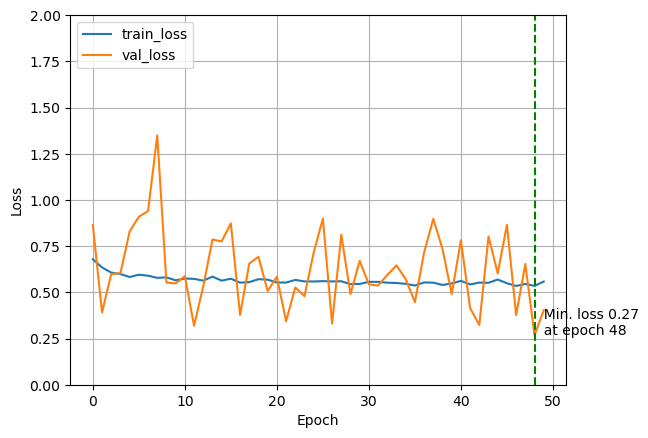

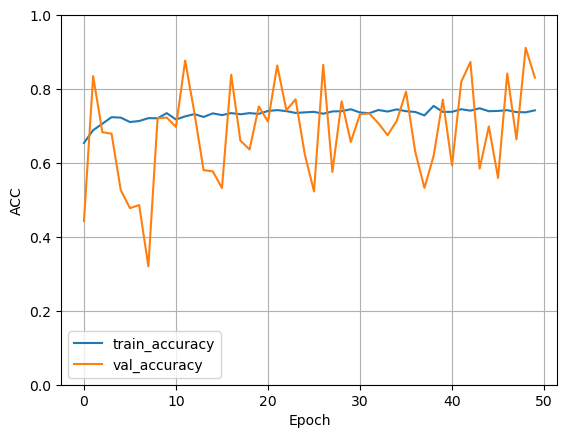

In [2]:
from plot_loss_and_acc import *
plot_loss_and_acc(trainer.logger.log_dir, loss_ylim=(0.0, 2.0), acc_ylim=(0.0, 1.0))

In [3]:
path = trainer.checkpoint_callback.best_model_path
print(path)

logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt


In [4]:
trainer.validate(model=model, datamodule=dm, ckpt_path=path)

Restoring states from the checkpoint path at logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt


Validation DataLoader 0: 100%|██████████| 88/88 [00:25<00:00,  3.42it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.9115329384803772     │
│         val_loss          │    0.2684180438518524     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.2684180438518524, 'val_accuracy': 0.9115329384803772}]

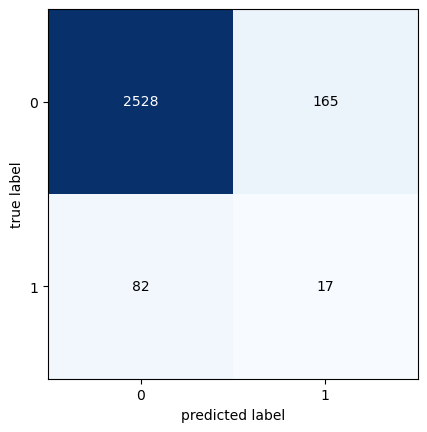

true negatives (TN): 2528
false positives (FP): 165
false negatives (FN): 82
true positives (TP): 17
accuracy: 0.9115329512893983
precision: 0.09340659340659341
recall: 0.1717171717171717
f1score: 0.12099644128113879
Parcel level accuracy: 0.9495 (94.95%)


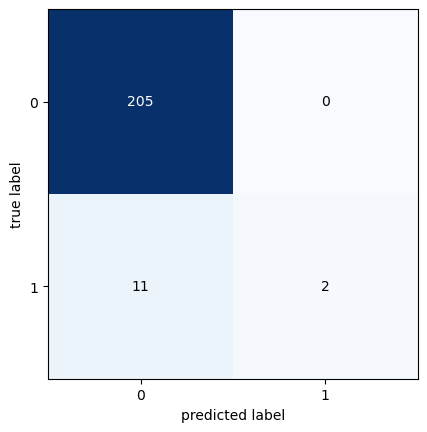

true negatives (TN): 205
false positives (FP): 0
false negatives (FN): 11
true positives (TP): 2
accuracy: 0.9495412844036697
precision: 1.0
recall: 0.15384615384615385
f1score: 0.2666666666666667


In [5]:
# Obtain validation dataset predictions
lightning_model = NN.load_from_checkpoint(
    path, model=pytorch_model)
lightning_model.eval();   

val_dataloader = dm.val_dataloader()

all_true_labels = []
all_predicted_labels = []
for batch in val_dataloader:
    features, labels = batch
    
    with torch.no_grad():
        logits = lightning_model(features)

    predicted_labels = torch.argmax(logits, dim=1)
    all_predicted_labels.append(predicted_labels)
    all_true_labels.append(labels)
    
all_predicted_labels1 = torch.cat(all_predicted_labels)
all_true_labels1 = torch.cat(all_true_labels)

from plot_loss_and_acc import *
confusion_matrix(all_predicted_labels1, all_true_labels1)
parcel_level_new(r"C:/Users/kaspe/OneDrive - Aarhus Universitet/Skrivebord/BI/4. semester/Data/LBST/val_set_1.csv", all_predicted_labels1)

In [6]:
print('Label predictions: ', '\n', all_predicted_labels1, '\n', 'Label truth: ', '\n', all_true_labels1)


Label predictions:  
 tensor([0, 0, 0,  ..., 0, 0, 0]) 
 Label truth:  
 tensor([0, 0, 0,  ..., 1, 1, 1])


# Learning rate = 0.0001 & batch size = 128

In [1]:
# Train model
from model import NN
from customDataModuleoriginal import CustomDataModule
import config
import pytorch_lightning as pl
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_lightning.loggers import CSVLogger
from lightning.pytorch import seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint
import torch
import torchvision.models as models
import torch.nn as nn

seed_everything(
    42, workers=True
)  # By setting workers=True in seed_everything(), Lightning derives unique seeds across all dataloader workers and processes for torch, numpy and stdlib random number generators. When turned on, it ensures that e.g. data augmentations are not repeated across workers.


callbacks = [ModelCheckpoint(
    save_top_k=1, mode='min', monitor="val_loss")]  # save top 1 model 


if __name__ == "__main__":
    
    pytorch_model = models.resnet18(weights='ResNet18_Weights.DEFAULT')
    
    logger = TensorBoardLogger("tb_logs_batchsize128lr", name="resnet_batchsize128lr") # tb_logs is the folder, name is the name of the experiment/model
    logger2 = CSVLogger(save_dir="logs-batchsize128lr/", name="resnet_batchsize128lr")
    
    model = NN(
        model=pytorch_model,
        input_shape=config.INPUT_SHAPE,
        num_classes=config.NUM_CLASSES,
        learning_rate=config.LEARNING_RATE,
    )  # .to(device)
    dm = CustomDataModule(
        data_dir=config.DATA_DIR,
        train_csv=config.TRAIN_CSV_1,
        val_csv=config.VAL_CSV_1,
        test_csv=config.TEST_CSV,
        batch_size=128,
        num_workers=config.NUM_WORKERS,
        mean=config.MEAN,
        std=config.STD
    )
    
    trainer = pl.Trainer(
        logger=[logger2, logger],
        accelerator=config.ACCELERATOR,
        devices=config.DEVICES,
        min_epochs=config.MIN_EPOCHS,
        max_epochs=config.MAX_EPOCHS,
        deterministic=config.DETERMINISTIC,
        callbacks=callbacks
    )
      # deterministic ensures random seed reproducibility

    trainer.fit(model, dm)  # it will automatically know which dataloader to use
    
# A general place to start is to set num_workers equal to the number of CPU cores on that machine. You can get the number of CPU cores in python using os.cpu_count(), but note that depending on your batch size, you may overflow RAM memory.


Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: logs/resnet_sklearnclassweights
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | ResNet           | 11.2 M
1 | loss_fn   | CrossEntropyLoss | 0     
2 | train_acc | BinaryAccuracy   | 0     
3 | val_acc   | BinaryAccuracy   | 0     
4 | test_acc  | BinaryAccuracy   | 0     
-----------------------------------------------
1.0 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Epoch 0: 100%|██████████| 321/321 [01:48<00:00,  2.95it/s, v_num=0]        
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|██████████| 321/321 [01:50<00:00,  2.90it/s, v_num=0, train_loss=0.679, train_accuracy=0.654]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 321/321 [01:45<00:00,  3.03it/s, v_num=0, train_loss=0.635, train_accuracy=0.689]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|██████████| 321/321 [01:45<00:00,  3.03it/s, v_num=0, train_loss=0.607, train_accuracy=0.706]
Validation: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████| 321/321 [01:44<00:00,  3.07it/s, v_num=0, train_loss=0.599, train_accuracy=0.724]
Validation: 0it [00:00, ?it/s]
Epoch 5: 100%|██████████| 321/321 [01:51<00:00,  2.88it/s, v_num=0, train_loss=0.583, train_accuracy=0.723]
Validation: 0it [00:00, ?it/s]
Epoch 6: 100%|██████████| 321/321 [01:50<00:00,  2.92it/s, v_num=0, train_loss=0.595, train_accuracy=0.711]
Validation: 0it [00:00, ?it/s]
Epoch 7: 100%|██████████| 321/321 [01:44<00:00,  3.08it/s, 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 321/321 [02:22<00:00,  2.25it/s, v_num=0, train_loss=0.558, train_accuracy=0.742]


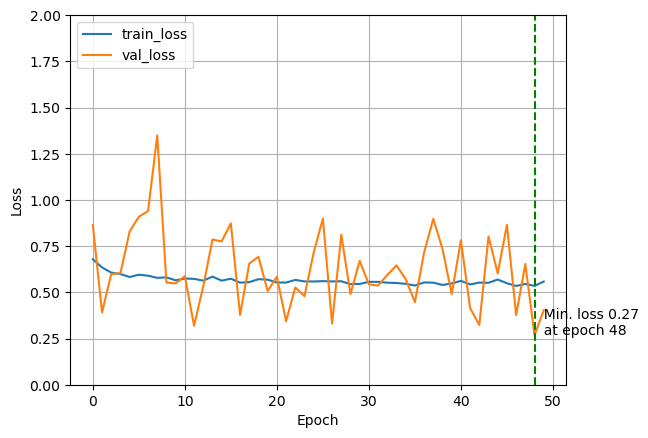

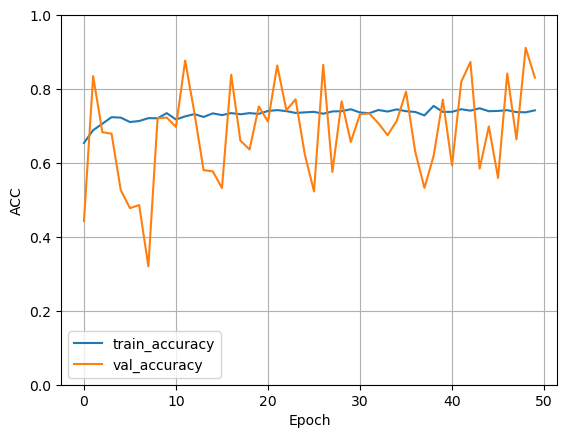

In [2]:
from plot_loss_and_acc import *
plot_loss_and_acc(trainer.logger.log_dir, loss_ylim=(0.0, 2.0), acc_ylim=(0.0, 1.0))

In [3]:
path = trainer.checkpoint_callback.best_model_path
print(path)

logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt


In [4]:
trainer.validate(model=model, datamodule=dm, ckpt_path=path)

Restoring states from the checkpoint path at logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt


Validation DataLoader 0: 100%|██████████| 88/88 [00:25<00:00,  3.42it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.9115329384803772     │
│         val_loss          │    0.2684180438518524     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.2684180438518524, 'val_accuracy': 0.9115329384803772}]

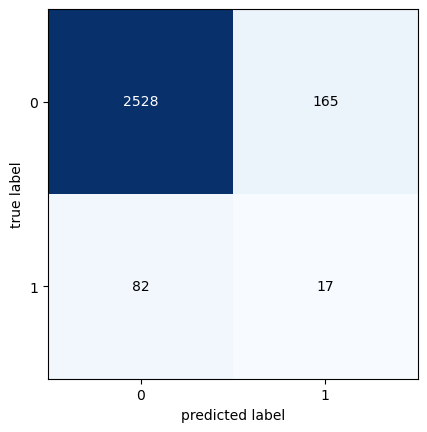

true negatives (TN): 2528
false positives (FP): 165
false negatives (FN): 82
true positives (TP): 17
accuracy: 0.9115329512893983
precision: 0.09340659340659341
recall: 0.1717171717171717
f1score: 0.12099644128113879
Parcel level accuracy: 0.9495 (94.95%)


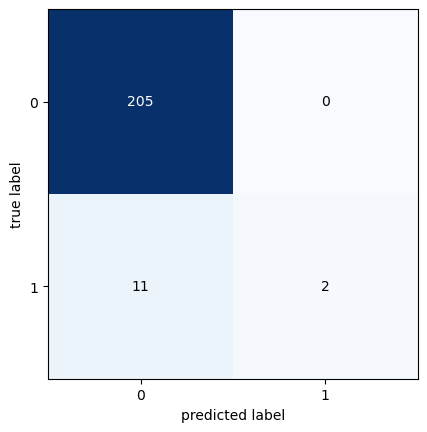

true negatives (TN): 205
false positives (FP): 0
false negatives (FN): 11
true positives (TP): 2
accuracy: 0.9495412844036697
precision: 1.0
recall: 0.15384615384615385
f1score: 0.2666666666666667


In [5]:
# Obtain validation dataset predictions
lightning_model = NN.load_from_checkpoint(
    path, model=pytorch_model)
lightning_model.eval();   

val_dataloader = dm.val_dataloader()

all_true_labels = []
all_predicted_labels = []
for batch in val_dataloader:
    features, labels = batch
    
    with torch.no_grad():
        logits = lightning_model(features)

    predicted_labels = torch.argmax(logits, dim=1)
    all_predicted_labels.append(predicted_labels)
    all_true_labels.append(labels)
    
all_predicted_labels1 = torch.cat(all_predicted_labels)
all_true_labels1 = torch.cat(all_true_labels)

from plot_loss_and_acc import *
confusion_matrix(all_predicted_labels1, all_true_labels1)
parcel_level_new(r"C:/Users/kaspe/OneDrive - Aarhus Universitet/Skrivebord/BI/4. semester/Data/LBST/val_set_1.csv", all_predicted_labels1)

In [6]:
print('Label predictions: ', '\n', all_predicted_labels1, '\n', 'Label truth: ', '\n', all_true_labels1)


Label predictions:  
 tensor([0, 0, 0,  ..., 0, 0, 0]) 
 Label truth:  
 tensor([0, 0, 0,  ..., 1, 1, 1])
